### Importing the Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
loan_data = pd.read_csv('Data for Cleaning & Modeling.csv',parse_dates=['X15', 'X23'])

In [5]:
loan_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,1994-02-01,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,2000-10-01,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,2000-06-01,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,1985-01-01,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,1996-12-01,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
X1     338990 non-null object
X2     399999 non-null float64
X3     399999 non-null float64
X4     399999 non-null object
X5     399999 non-null object
X6     399999 non-null object
X7     399999 non-null object
X8     338730 non-null object
X9     338730 non-null object
X10    376014 non-null object
X11    382462 non-null object
X12    338639 non-null object
X13    338972 non-null float64
X14    399999 non-null object
X15    399999 non-null datetime64[ns]
X16    123560 non-null object
X17    399999 non-null object
X18    399981 non-null object
X19    399999 non-null object
X20    399999 non-null object
X21    399999 non-null float64
X22    399999 non-null float64
X23    399999 non-null datetime64[ns]
X24    399999 non-null float64
X25    181198 non-null float64
X26    51155 non-null float64
X27    399999 non-null float64
X28    399999 non-null float64
X29    399999 non-null f

In [7]:
loan_data.isnull().sum()/len(loan_data)

X1     0.152525
X2     0.000003
X3     0.000003
X4     0.000003
X5     0.000003
X6     0.000003
X7     0.000003
X8     0.153175
X9     0.153175
X10    0.059965
X11    0.043845
X12    0.153402
X13    0.152570
X14    0.000003
X15    0.000003
X16    0.691100
X17    0.000003
X18    0.000048
X19    0.000003
X20    0.000003
X21    0.000003
X22    0.000003
X23    0.000003
X24    0.000003
X25    0.547005
X26    0.872112
X27    0.000003
X28    0.000003
X29    0.000003
X30    0.000668
X31    0.000003
X32    0.000003
dtype: float64

### Cleaning the Data and Getting the Train Set

In [8]:
def null_check(col_name):
    print(loan_data[col_name].isnull().sum())

In [9]:
#Dropping the one row that has many nulls 
loan_data.drop([364111],inplace=True)

In [10]:
#X1 - Interest Rate - remove % sign and convert to float

loan_data.X1 = loan_data.X1.str.replace('%','').astype('float64')
loan_data.X1[0:10]

0    11.89
1    10.71
2    16.99
3    13.11
4    13.57
5    19.05
6    10.08
7    14.26
8     7.88
9    14.96
Name: X1, dtype: float64

In [11]:
#X2 and X3 - Unique IDs - drop columns

loan_data.drop(['X2', 'X3'], axis=1, inplace=True) 

In [12]:
#X4, X5, X6 - Loan Amounts - strip $ sign and convert to float

loan_data['X4'] = loan_data['X4'].str.strip('$').str.replace(',','').astype('float64')
loan_data['X5'] = loan_data['X5'].str.strip('$').str.replace(',','').astype('float64')
loan_data['X6'] = loan_data['X6'].str.strip('$').str.replace(',','').astype('float64')

In [13]:
#X7 - number of payments 36 or 60 months - encode to 0, 1
loan_data['X7'] = loan_data['X7'].str.strip()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(loan_data['X7'].unique())
values = le.transform(loan_data['X7'].values)
loan_data['X7'] = values

In [14]:
loan_data['X7'].value_counts()

0    292369
1    107630
Name: X7, dtype: int64

In [15]:
loan_data['X8'].value_counts()

B    101668
C     90071
D     55621
A     53707
E     25518
F      9784
G      2361
Name: X8, dtype: int64

In [16]:
#X8 - Filling Missing Values
loan_data['X8'] = loan_data['X8'].fillna(method='bfill')
loan_data['X8'].value_counts()

B    119983
C    106288
D     65816
A     63507
E     30060
F     11541
G      2804
Name: X8, dtype: int64

In [17]:
le = LabelEncoder()
le.fit(loan_data['X8'].unique())
values = le.transform(loan_data['X8'].values)
loan_data['X8'] = values
loan_data['X8'].value_counts()

1    119983
2    106288
3     65816
0     63507
4     30060
5     11541
6      2804
Name: X8, dtype: int64

In [18]:
#X9 Loan Sub Categories - Filling Missing Values and Encoding 
loan_data['X9'] = loan_data['X9'].fillna(method='bfill')

le = LabelEncoder()
le.fit(loan_data['X9'].unique())
values = le.transform(loan_data['X9'].values)
loan_data['X9'] = values
loan_data['X9'].value_counts()

7     28301
8     26786
6     23375
10    22752
11    22691
9     21654
12    21545
13    20325
5     19867
14    18975
4     18333
15    16450
3     16353
16    14817
17    12726
18    11946
2     10728
19     9877
1      9095
0      8998
20     7545
21     7341
22     5826
23     5036
24     4312
25     3407
26     2584
27     2366
28     1810
29     1374
30      944
31      698
32      523
33      349
34      290
Name: X9, dtype: int64

In [19]:
loan_data['X10'] = loan_data['X10'].str.lower().str.strip()
loan_data['X10'] = loan_data['X10'].fillna(method='bfill')

In [20]:
loan_data.loc[loan_data['X10'].str.contains('manager'),'X10'] = 'manager'

In [21]:
loan_data.loc[loan_data['X10'].str.contains('president'),'X10'] = 'president'
loan_data.loc[loan_data['X10'].str.contains('vp'),'X10'] = 'president'
loan_data.loc[loan_data['X10'].str.contains('analyst'),'X10'] = 'analyst'
loan_data.loc[loan_data['X10'].str.contains('driver'),'X10'] = 'driver'
loan_data.loc[loan_data['X10'].str.contains('engineer'),'X10'] = 'engineer'
loan_data.loc[loan_data['X10'].str.contains('assistant'),'X10'] = 'assistant'


In [22]:
x = list(loan_data['X10'].value_counts()[1:30].index)

In [23]:
loan_data.loc[~loan_data['X10'].isin(x),'X10'] = 'other'


In [24]:
le = LabelEncoder()
le.fit(loan_data['X10'].unique())
values = le.transform(loan_data['X10'].values)
loan_data['X10'] = values
loan_data['X10'].value_counts()

15    340868
11      7666
2       6669
1       6540
25      5599
9       4985
19      4591
20      2768
24      2474
21      2069
22      2059
16      1755
8       1107
27       982
18       977
4        794
0        781
26       767
14       726
13       691
5        655
17       530
7        519
29       519
23       512
10       497
28       488
3        479
12       471
6        461
Name: X10, dtype: int64

In [25]:
loan_data['X11'] = loan_data['X11'].fillna(method='bfill')

le = LabelEncoder()
le.fit(loan_data['X11'].unique())
values = le.transform(loan_data['X11'].values)
loan_data['X11'] = values
loan_data['X11'].value_counts()

1     134220
2      37032
3      32812
10     31960
5      28525
0      26421
4      25087
6      24055
7      23902
8      20011
9      15974
Name: X11, dtype: int64

In [26]:
loan_data['X12'] = loan_data['X12'].fillna(method='ffill')
loan_data['X12'] = loan_data['X12'].str.replace('NONE','OTHER')
loan_data['X12'] = loan_data['X12'].str.replace('ANY','OTHER')

In [27]:
le = LabelEncoder()
le.fit(loan_data['X12'].unique())
values = le.transform(loan_data['X12'].values)
loan_data['X12'] = values
loan_data['X12'].value_counts()

0    203074
3    161780
2     34950
1       195
Name: X12, dtype: int64

In [28]:
#X13 - Annual Income of Borrower 
round(loan_data['X13'].describe(),0)

count     338972.0
mean       73160.0
std        55868.0
min         3000.0
25%        45000.0
50%        63000.0
75%        88200.0
max      7500000.0
Name: X13, dtype: float64

In [29]:
loan_data['X13'] = loan_data['X13'].fillna(loan_data['X13'].median())

In [30]:
#X14

loan_data['X14'].value_counts()

VERIFIED - income           149686
not verified                127220
VERIFIED - income source    123093
Name: X14, dtype: int64

In [31]:
le = LabelEncoder()
le.fit(loan_data['X14'].unique())
values = le.transform(loan_data['X14'].values)
loan_data['X14'] = values
loan_data['X14'].value_counts()

0    149686
2    127220
1    123093
Name: X14, dtype: int64

In [32]:
import datetime

loan_data['day_of_loan'] = loan_data['X15'].dt.day
loan_data['month_of_loan'] = loan_data['X15'].dt.month
loan_data.drop(['X15'],axis=1,inplace=True)

In [33]:
loan_data.drop(['X16'],axis=1,inplace=True)

In [34]:
#X17 - Loan Category
print(loan_data['X17'].isnull().sum())

le = LabelEncoder()
le.fit(loan_data['X17'].unique())
values = le.transform(loan_data['X17'].values)
loan_data['X17'] = values
loan_data['X17'].value_counts()

0


2     233794
1      89484
4      23140
9      20161
6       8664
11      6287
0       4861
7       3935
8       2562
13      2287
12      2159
5       2032
3        325
10       308
Name: X17, dtype: int64

In [35]:
#X18 - Loan Title 
loan_data['X18'] = loan_data['X18'].str.lower().str.strip()
loan_data['X18'] = loan_data['X18'].fillna('consolidation')

In [36]:
loan_data.loc[loan_data['X18'].str.contains('consolidation'),'X18'] = 'consolidation'
loan_data.loc[loan_data['X18'].str.contains('consolidate'),'X18'] = 'consolidation'
loan_data.loc[loan_data['X18'].str.contains('card'),'X18'] = 'credit card'
loan_data.loc[loan_data['X18'].str.contains('home improvement loan'),'X18'] = 'home improvement'
loan_data.loc[loan_data['X18'].str.contains('home'),'X18'] = 'home improvement'
loan_data.loc[loan_data['X18'].str.contains('home buying'),'X18'] = 'home improvement'
loan_data.loc[loan_data['X18'].str.contains('my loan'),'X18'] = 'loan'
loan_data.loc[loan_data['X18'].str.contains('car'),'X18'] = 'car'
loan_data.loc[loan_data['X18'].str.contains('debt'),'X18'] = 'debt'
loan_data.loc[loan_data['X18'].str.contains('medical'),'X18'] = 'medical'
loan_data.loc[loan_data['X18'].str.contains('business'),'X18'] = 'business'
loan_data.loc[loan_data['X18'].str.contains('wedding'),'X18'] = 'wedding'

In [37]:
x18_list = list(loan_data['X18'].value_counts()[loan_data['X18'].value_counts()>1000].index)

In [38]:
loan_data.loc[~loan_data['X18'].isin(x18_list),'X18'] = 'other'


In [39]:
le = LabelEncoder()
le.fit(loan_data['X18'].unique())
values = le.transform(loan_data['X18'].values)
loan_data['X18'] = values
loan_data['X18'].value_counts()

2     184026
1      75581
10     72766
5      20412
3      18854
0       5026
7       3883
8       3442
13      3328
6       2903
15      2310
12      2106
14      1459
11      1459
4       1324
9       1120
Name: X18, dtype: int64

In [40]:
loan_data['X19'] = loan_data['X19'].str.strip('xx').astype('float')

In [41]:
le = LabelEncoder()
le.fit(loan_data['X20'].unique())
values = le.transform(loan_data['X20'].values)
loan_data['X20'] = values
loan_data['X20'].value_counts()

4     62194
33    34557
42    31277
9     26991
14    15877
30    15574
37    13983
34    12970
10    12755
44    12252
27    10875
22     9857
19     9527
20     9414
46     9144
3      9134
5      8417
23     6907
24     6434
6      6175
32     5594
15     5449
36     5171
47     5000
1      4993
41     4970
18     4770
39     4731
17     3756
16     3640
35     3546
2      2971
43     2959
31     2190
11     2124
48     2064
29     1923
38     1758
7      1267
26     1188
0      1108
8      1072
49      983
40      854
25      828
45      748
13        9
28        8
12        7
21        4
Name: X20, dtype: int64

In [42]:
print(null_check('X21'))
loan_data['X21'].value_counts()

0
None


14.40    360
19.20    328
12.00    328
0.00     326
18.00    323
16.80    314
20.40    306
13.20    302
15.60    298
21.60    274
10.80    264
22.80    259
12.48    252
16.20    249
24.00    245
9.60     245
16.32    244
15.84    244
17.04    242
18.60    240
15.12    239
13.44    239
16.08    238
12.72    236
14.64    235
17.76    232
16.56    232
11.52    232
14.88    230
13.92    230
        ... 
35.05      1
39.08      1
35.69      1
38.16      1
35.50      1
36.56      1
37.44      1
37.11      1
35.63      1
38.98      1
36.26      1
35.55      1
36.54      1
36.28      1
38.01      1
38.97      1
37.34      1
37.66      1
38.36      1
39.35      1
36.98      1
36.44      1
36.75      1
37.56      1
37.00      1
37.86      1
37.64      1
37.55      1
39.33      1
36.41      1
Name: X21, Length: 3955, dtype: int64

In [43]:
print(null_check('X22'))
loan_data['X22'].value_counts()

0
None


0.0     330533
1.0      47138
2.0      13561
3.0       4675
4.0       1922
5.0        994
6.0        516
7.0        274
8.0        140
9.0         84
10.0        55
11.0        32
12.0        28
13.0        16
14.0         6
18.0         6
16.0         5
15.0         5
17.0         3
19.0         2
21.0         1
22.0         1
29.0         1
24.0         1
Name: X22, dtype: int64

In [44]:
print(null_check('X23'))
loan_data['day of first credit'] = loan_data['X23'].dt.day
loan_data['month of first credit'] = loan_data['X23'].dt.month
loan_data['year of first credit'] = loan_data['X23'].dt.year
loan_data.drop(['X23'],axis=1,inplace=True)

0
None


In [45]:
print(null_check('X24'))
loan_data['X24'].value_counts()

0
None


0.0    203168
1.0    112483
2.0     51962
3.0     23234
4.0      6047
5.0      2158
6.0       877
7.0        48
8.0        22
Name: X24, dtype: int64

In [46]:
print(loan_data['X25'].isnull().sum()/len(loan_data))
#Since the number of missing values is more than 50% - I will drop the column 

loan_data.drop(['X25'],axis=1,inplace=True)

0.5470038675096688


In [47]:
print(loan_data['X26'].isnull().sum()/len(loan_data))
#Since the number of missing values is more than 50% - I will drop the column 

loan_data.drop(['X26'],axis=1,inplace=True)

0.8721121802804507


In [48]:
#X27 - number of open credit lines
loan_data['X27'].value_counts()

9.0     38245
10.0    36757
8.0     36285
11.0    33862
7.0     32615
12.0    30030
6.0     26583
13.0    25549
14.0    21223
5.0     18430
15.0    17269
16.0    14279
17.0    11420
4.0     10713
18.0     9175
19.0     7214
20.0     5520
3.0      4691
21.0     4366
22.0     3383
23.0     2574
24.0     2021
2.0      1562
25.0     1526
26.0     1044
27.0      798
28.0      579
29.0      470
30.0      366
31.0      248
32.0      224
33.0      166
34.0      137
35.0      127
36.0       98
1.0        94
37.0       80
38.0       59
39.0       52
41.0       29
40.0       28
42.0       24
43.0       15
45.0       13
44.0        9
49.0        8
0.0         7
51.0        5
46.0        5
50.0        4
48.0        4
53.0        3
47.0        3
58.0        2
62.0        1
54.0        1
61.0        1
52.0        1
55.0        1
76.0        1
Name: X27, dtype: int64

In [49]:
loan_data['X28'].value_counts()

0.0     349514
1.0      44065
2.0       4351
3.0       1239
4.0        398
5.0        217
6.0        107
7.0         49
8.0         20
9.0         13
10.0        10
11.0         5
13.0         2
21.0         1
18.0         1
49.0         1
54.0         1
14.0         1
34.0         1
17.0         1
40.0         1
63.0         1
Name: X28, dtype: int64

In [50]:
loan_data['X29'].value_counts()

0.0         1990
7429.0        37
8708.0        36
6223.0        36
5143.0        35
5365.0        35
6095.0        35
12061.0       34
9208.0        34
4802.0        34
5655.0        34
4532.0        34
6603.0        34
8476.0        34
7404.0        34
6507.0        34
8447.0        34
5152.0        34
5235.0        34
10222.0       33
6683.0        33
11672.0       33
6339.0        33
5804.0        33
6764.0        33
9583.0        33
4948.0        33
8757.0        32
6422.0        32
5459.0        32
            ... 
48200.0        1
62562.0        1
48198.0        1
49665.0        1
49667.0        1
99341.0        1
49671.0        1
154730.0       1
198690.0       1
38681.0        1
49674.0        1
153408.0       1
49681.0        1
54548.0        1
62480.0        1
99403.0        1
99366.0        1
49685.0        1
49687.0        1
77351.0        1
77349.0        1
57750.0        1
49692.0        1
44754.0        1
99389.0        1
70270.0        1
70158.0        1
38671.0       

In [51]:
#X30 - Utilization Rate
loan_data['X30'] = loan_data['X30'].str.strip('%').astype('float')

In [52]:
loan_data['X30'] = loan_data['X30'].fillna(loan_data['X30'].median())

In [53]:
loan_data['X31'].dtype

dtype('float64')

In [54]:
loan_data['X32']

le = LabelEncoder()
le.fit(loan_data['X32'].unique())
values = le.transform(loan_data['X32'].values)
loan_data['X32'] = values
loan_data['X32'].value_counts()

0    274313
1    125686
Name: X32, dtype: int64

In [55]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399999 entries, 0 to 399999
Data columns (total 30 columns):
X1                       338989 non-null float64
X4                       399999 non-null float64
X5                       399999 non-null float64
X6                       399999 non-null float64
X7                       399999 non-null int64
X8                       399999 non-null int64
X9                       399999 non-null int64
X10                      399999 non-null int64
X11                      399999 non-null int64
X12                      399999 non-null int64
X13                      399999 non-null float64
X14                      399999 non-null int64
X17                      399999 non-null int64
X18                      399999 non-null int64
X19                      399999 non-null float64
X20                      399999 non-null int64
X21                      399999 non-null float64
X22                      399999 non-null float64
X24                      39

### Exploratory Data Analysis

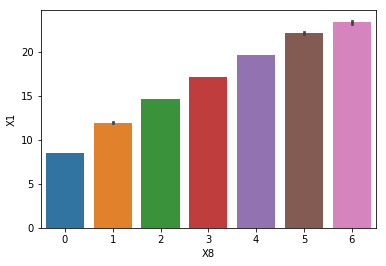

In [56]:
#Loan Grade and Interest Rate
sns.barplot(x='X8',y='X1',data=loan_data)

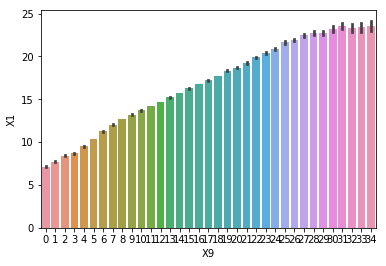

In [57]:
#Loan SubGrade and Avg Interest Rate
sns.barplot(x='X9',y='X1',data=loan_data)

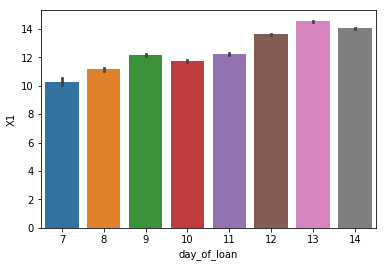

In [58]:
sns.barplot(x='day_of_loan',y='X1',data=loan_data)

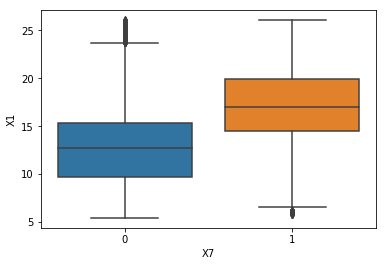

In [59]:
#Number of Payments (X7) vs. BoxPlot of Interest Rate
sns.boxplot(x='X7',y='X1',data=loan_data)

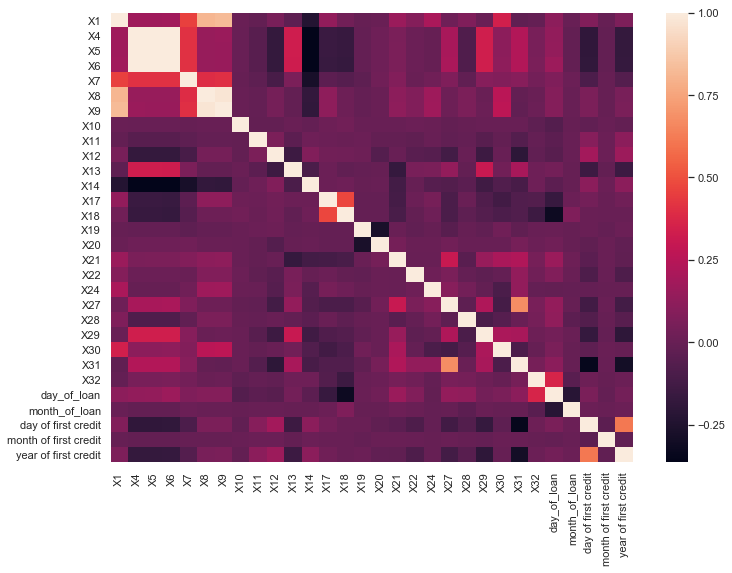

In [62]:
corr = loan_data.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Train and Test Split

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import pickle

In [64]:
train_set = loan_data.loc[~loan_data['X1'].isnull(),]

In [65]:
test_set = train_set['X1']

In [66]:
train_set.drop(['X1'],axis=1,inplace=True)

####  Trying PCA on the Train Set

In [105]:
pca = PCA(n_components=15)
pca.fit(train_set)
pca.set = pca.fit_transform(train_set)

In [106]:
pca.set.shape

(338989, 15)

In [107]:
def plot_naive_variance(pca):

    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_)

    return ax

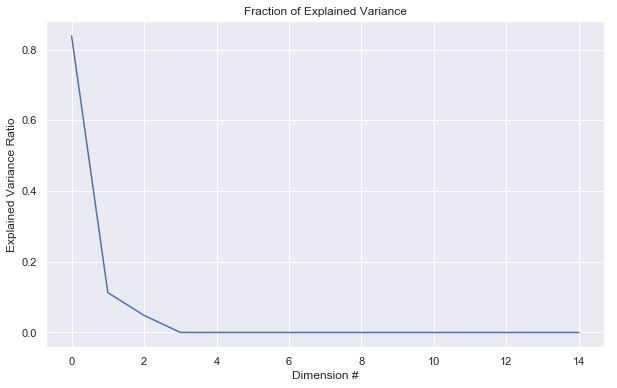

In [108]:
plot_naive_variance(pca)

**Tried several models with PCA set of the training set, but that didn't improve accuracy significantly. Thus, the PCA set was not used in the final model.**

#### New Train Set after Dropping Several Columns 

In [120]:
train_set_final = train_set.drop(['X10','X18'],axis=1)

In [121]:
train_set.shape

(338989, 29)

In [122]:
train_set_final.shape

(338989, 27)

In [123]:
train_set_final.head()

,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,...,X28,X29,X30,X31,X32,day_of_loan,month_of_loan,day of first credit,month of first credit,year of first credit
0,25000.0,25000.0,19080.0,0,1,8,10,3,85000.0,0,...,0.0,28854.0,52.1,42.0,0,9,8,1,2,1994
1,7000.0,7000.0,673.0,0,1,9,10,3,65000.0,2,...,0.0,33623.0,76.7,7.0,0,8,5,1,10,2000
2,25000.0,25000.0,24725.0,0,3,17,0,3,70000.0,0,...,0.0,19878.0,66.3,17.0,0,14,8,1,6,2000
3,1200.0,1200.0,1200.0,0,2,11,1,2,54000.0,2,...,0.0,2584.0,40.4,31.0,0,10,3,1,1,1985
4,10800.0,10800.0,10692.0,0,2,12,6,3,32000.0,2,...,0.0,3511.0,25.6,40.0,0,9,11,1,12,1996


In [125]:
X_train,X_test,y_train,y_test=train_test_split(train_set_final,test_set,test_size=0.20,random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

(271191, 27)
(67798, 27)
(271191,)
(67798,)
             X4       X5       X6  X7  X8  X9  X11  X12       X13  X14  \
136462  20000.0  20000.0  20000.0   0   0   1    9    3   67000.0    0   
279832  24000.0  24000.0  24000.0   1   2  13   10    3   63000.0    1   
158193  28000.0  28000.0  28000.0   0   1   5    5    3  600000.0    0   
133672  28000.0  28000.0  27975.0   1   2  13    1    0  100000.0    1   
21042   11000.0  11000.0  11000.0   0   0   4    7    0   32000.0    1   

                ...           X28      X29   X30   X31  X32  day_of_loan  \
136462          ...           0.0  14569.0  54.0  27.0    0           13   
279832          ...           0.0   5180.0  79.7  13.0    0           14   
158193          ...           0.0  17873.0  35.0  19.0    0           13   
133672          ...           0.0  26998.0  51.9  33.0    0           13   
21042           ...           0.0      0.0   0.0   6.0    0           11   

        month_of_loan  day of first credit  month of f

### Testing Different Regression Models

#### Linear Regression

In [126]:
ln = LinearRegression()
ln.fit(X_train,y_train)
y_pred = ln.predict(X_test)

In [127]:
from sklearn.metrics import mean_squared_error as MSE
score = ln.score(X_test,y_test)
print('Model Score: ', score)
mse = MSE(y_test,y_pred)
rmse = np.sqrt(mse)
print('RMSE: ',rmse)

Model Score:  0.752249009188102
RMSE:  2.1890205239160307


In [128]:
imp_features = pd.DataFrame(X_train.columns,abs(ln.coef_)).reset_index().sort_values(by='index',ascending=False)
imp_features.columns = ['Abs Coefficient Value','Column Name']
imp_features

,Abs Coefficient Value,Column Name
3,1.619891,X7
5,0.425558,X9
15,0.416179,X24
21,0.314922,X32
17,0.303303,X28
9,0.284612,X14
14,0.240910,X22
22,0.152875,day_of_loan
10,0.140611,X17
7,0.104663,X12


#### Random Forest Regressor


In [143]:
rf = RandomForestRegressor(n_estimators=100,random_state=0,n_jobs=-1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [144]:
from sklearn.metrics import mean_squared_error as MSE
score = rf.score(X_test,y_test)
print('Model Score: ', score)
mse = MSE(y_test,y_pred)
rmse = np.sqrt(mse)
print('RMSE: ',rmse)

Model Score:  0.8331936657196132
RMSE:  1.7961739879897427


In [145]:
imp_features = pd.DataFrame(X_train.columns,rf.feature_importances_).reset_index().sort_values(by='index',ascending=False)
imp_features.columns = ['Feature Importance','Column Name']
imp_features

,Feature Importance,Column Name
5,0.683006,X9
19,0.038923,X30
3,0.036799,X7
22,0.030039,day_of_loan
18,0.018591,X29
4,0.017127,X8
8,0.015147,X13
13,0.015044,X21
10,0.014722,X17
15,0.014240,X24


In [146]:
from sklearn.model_selection import cross_val_score

CV_scores = cross_val_score(rf, X_train, y_train, cv=10, n_jobs=-1) 

print(CV_scores)

print('mean CV score:', round(CV_scores.mean(),2))

[0.83362823 0.83061115 0.82544872 0.82838364 0.83202218 0.827472
 0.83129811 0.82765118 0.82110368 0.83103803]
mean CV score: 0.83


#### Gradient Boosting Regressor

In [133]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [134]:
from sklearn.metrics import mean_squared_error as MSE
score = rf.score(X_test,y_test)
print('Model Score: ', score)
mse = MSE(y_test,y_pred)
rmse = np.sqrt(mse)
print('RMSE: ',rmse)

Model Score:  0.8313491719298967
RMSE:  1.9414334315544488


### Write Up for Final Model

Once the data was cleaned, I looked at some relationships between the variables to see which variables were the most correlated with interest rates by looking at the heatmap from the correlation matrix. 

I first tried applying PCA with 20 components and ran the Linear Regression and Random Forest with the PCA, however, I got a RMSE value that was higher (2.33) than running the Linear Regression/Random Forest without the PCA. Thus, I proceeded with running Linear Regression, Random Forest, and Gradient Boosting without the PCA. 

In this case, Random Forest was giving be the most optimal results (lowest RMSE) out of the three models, so I decided to use Random Forest as my final model for the prediction. I also did some model tuning and changed some of the values for the n_estimators and selected 100 as my final value. While tuning the model I also looked at the feature importance list to see which features were the most important, and from there I went back and removed some features which I believed were poor predictors (X10 and X18).

**Final Model selected is Random Forest Regressor.**

In [161]:
final_model = rf

### Applying Model on Holdout Set

**The holdout set was cleaned using a different python workbook, which is also in the submission folder.**

In [162]:
holdout_set = pd.read_csv('holdout_clean.csv')

In [163]:
holdout_set.head()

,Unnamed: 0,X1,X4,X5,X6,X7,X8,X9,X10,X11,...,X28,X29,X30,X31,X32,day_of_loan,month_of_loan,day of first credit,month of first credit,year of first credit
0,0,NaN,6000.0,6000.0,6000.0,0,2,14,12,1,...,0,19861,64.5,33,0,15,3,2,11,2019
1,1,NaN,24000.0,24000.0,24000.0,0,0,0,4,8,...,0,17001,26.2,36,1,15,3,1,12,2068
2,2,NaN,35000.0,35000.0,35000.0,0,2,11,18,1,...,0,25797,49.9,33,1,15,3,1,10,1998
3,3,NaN,10000.0,10000.0,10000.0,1,3,15,18,1,...,1,9586,43.8,21,1,15,3,1,2,1999
4,4,NaN,24000.0,24000.0,24000.0,1,1,5,18,1,...,0,31842,41.3,43,1,15,3,2,12,2019


In [164]:
holdout_set = holdout_set.drop(holdout_set.columns[0], axis=1)

In [165]:
holdout_set.drop(['X1','X10','X18'],axis=1,inplace=True)

In [166]:
holdout_set.head()

,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,...,X28,X29,X30,X31,X32,day_of_loan,month_of_loan,day of first credit,month of first credit,year of first credit
0,6000.0,6000.0,6000.0,0,2,14,1,0,68000.0,0,...,0,19861,64.5,33,0,15,3,2,11,2019
1,24000.0,24000.0,24000.0,0,0,0,8,2,110480.0,0,...,0,17001,26.2,36,1,15,3,1,12,2068
2,35000.0,35000.0,35000.0,0,2,11,1,0,86000.0,0,...,0,25797,49.9,33,1,15,3,1,10,1998
3,10000.0,10000.0,10000.0,1,3,15,1,2,30000.0,1,...,1,9586,43.8,21,1,15,3,1,2,1999
4,24000.0,24000.0,24000.0,1,1,5,1,0,82500.0,0,...,0,31842,41.3,43,1,15,3,2,12,2019


In [167]:
holdout_predictions = final_model.predict(holdout_set)

In [168]:
holdout_predictions

array([15.7221,  6.2638, 15.1646, ..., 10.1027, 14.8918, 13.5977])

In [169]:
holdout_final_set = pd.read_csv('Holdout for Testing.csv')

In [170]:
holdout_final_set['X1'] = holdout_predictions

In [171]:
holdout_final_set = holdout_final_set[['X1','X2','X3']]

In [172]:
holdout_final_set.to_csv('loan_results_chiraagk.csv',index=False)